# Homework 3
## Mengxiang Jiang

The majority of the code here comes from the [Companion Jupyter notebooks for the book "Deep Learning with Python"](https://github.com/fchollet/deep-learning-with-python-notebooks) by François Chollet, specifically chapter 2.
If the code comes from somewhere else it will have a source linked to the original.\
[Video Link](https://youtu.be/bac1f8u-l4A)

**My Installation of Tensorflow on Ubuntu 22.04**

I followed this [guide](https://www.tensorflow.org/install/pip#step-by-step_instructions), except using python 3.8 rather than 3.9.\
For installing the Nvidia GPU driver, I followed the manual install part of this [guide](https://linuxconfig.org/how-to-install-the-nvidia-drivers-on-ubuntu-22-04).\
After the completing the installation and running the code, I found some warning/error messages that were fixed following these links:\
[successful NUMA node read from SysFS had negative value (-1)](https://stackoverflow.com/questions/44232898/memoryerror-in-tensorflow-and-successful-numa-node-read-from-sysfs-had-negativ)\
[Could not load dynamic library 'libnvinfer.so.7'](https://stackoverflow.com/questions/74956134/could-not-load-dynamic-library-libnvinfer-so-7)

**Loading the MNIST dataset in Keras**

In [1]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

2023-02-10 15:52:33.484685: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-02-10 15:52:33.546885: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


**Preparing the image data**

In [2]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255

**imports for network architecture**

In [3]:
from tensorflow import keras
from tensorflow.keras import layers

**function for generating and compiling a model with variable number of neurons in the first hidden layer**

In [4]:
def single_layer_model(neurons):
    model = keras.Sequential([
        layers.Dense(neurons, activation="relu"),
        layers.Dense(10, activation="softmax")
    ])
    model.compile(
        optimizer="rmsprop",
        loss="sparse_categorical_crossentropy",
        metrics=["accuracy"]
    )
    return model


**function for evaluating models with variable number of neurons**

In [5]:
def evaluate_networks(neuron_counts, model_fun):
    train_accuracies = []
    train_losses = []
    test_accuracies = []
    test_losses = []
    for n in neuron_counts:
        model = model_fun(n)
        model.fit(train_images, train_labels, epochs=5, batch_size=128)
        train_loss, train_acc = model.evaluate(train_images, train_labels)
        train_accuracies.append(train_acc)
        train_losses.append(train_loss)
        test_loss, test_acc = model.evaluate(test_images, test_labels)
        test_accuracies.append(test_acc)
        test_losses.append(test_loss)
    return {
        'Number of Neurons': neuron_counts,
        'Training Accuracy': train_accuracies,
        'Training Loss': train_losses,
        'Testing Accuracy': test_accuracies,
        'Testing Loss': test_losses
    }

**generate models from 4 neurons up to 512, evaluate them, and store the results**

In [6]:
neuron_counts = [4, 8, 16, 32, 64, 128, 256, 512]

one_layer_results = evaluate_networks(neuron_counts, single_layer_model)

Epoch 1/5


2023-02-10 15:52:34.693249: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-02-10 15:52:34.972231: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1613] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 7878 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3080, pci bus id: 0000:01:00.0, compute capability: 8.6
2023-02-10 15:52:35.717656: I tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:630] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.
2023-02-10 15:52:35.719056: I tensorflow/compiler/xla/service/service.cc:173] XLA service 0x7f0f4fecb360 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-02-10 

469/469 [==============================] - 1s 765us/step - loss: 1.4760 - accuracy: 0.4825
Epoch 2/5
469/469 [==============================] - 0s 761us/step - loss: 1.0192 - accuracy: 0.6707
Epoch 3/5
469/469 [==============================] - 0s 734us/step - loss: 0.9001 - accuracy: 0.7257
Epoch 4/5
469/469 [==============================] - 0s 774us/step - loss: 0.8365 - accuracy: 0.7471
Epoch 5/5
313/313 [==============================] - 0s 544us/step - loss: 0.6630 - accuracy: 0.8152
Epoch 1/5
469/469 [==============================] - 1s 749us/step - loss: 0.8897 - accuracy: 0.7544
Epoch 2/5
469/469 [==============================] - 0s 801us/step - loss: 0.3955 - accuracy: 0.8927
Epoch 3/5
469/469 [==============================] - 0s 778us/step - loss: 0.3401 - accuracy: 0.9064
Epoch 4/5
469/469 [==============================] - 0s 826us/step - loss: 0.3154 - accuracy: 0.9128
Epoch 5/5
313/313 [==============================] - 0s 583us/step - loss: 0.2994 - accuracy: 0.9170


**pandas dataframe of results**

In [7]:
import pandas as pd

df1 = pd.DataFrame(one_layer_results)
print(df1)

   Number of Neurons  Training Accuracy  Training Loss  Testing Accuracy  \
0                  4           0.815883       0.671538            0.8152   
1                  8           0.919033       0.292163            0.9170   
2                 16           0.938217       0.219074            0.9354   
3                 32           0.960167       0.139725            0.9557   
4                 64           0.973600       0.093716            0.9682   
5                128           0.981950       0.062483            0.9722   
6                256           0.990550       0.035389            0.9800   
7                512           0.989667       0.033696            0.9788   

   Testing Loss  
0      0.663016  
1      0.299405  
2      0.227123  
3      0.154630  
4      0.108286  
5      0.089285  
6      0.068397  
7      0.073081  


**plot of results**

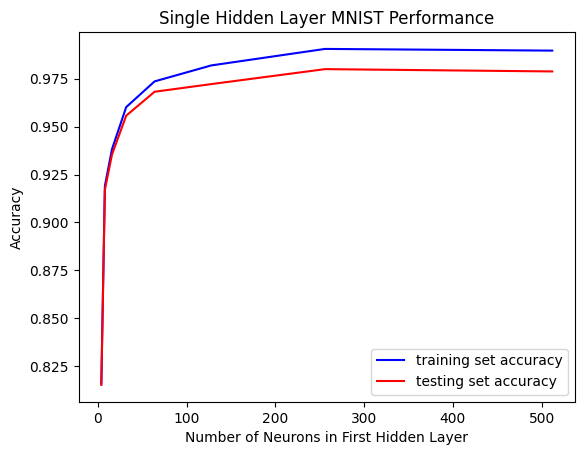

In [8]:
import matplotlib.pyplot as plt

plt.title("Single Hidden Layer MNIST Performance")
plt.xlabel("Number of Neurons in First Hidden Layer")
plt.ylabel("Accuracy")
plt.plot(neuron_counts, one_layer_results['Training Accuracy'], c='blue', label='training set accuracy')
plt.plot(neuron_counts, one_layer_results['Testing Accuracy'], c='red', label='testing set accuracy')
plt.legend()
plt.show()

**function for generating and compiling a model with variable number of neurons in the second hidden layer**

In [9]:
def two_layer_model(neurons):
    model = keras.Sequential([
        layers.Dense(256, activation="relu"), # the 256 seems to be a good number in the one hidden layer model
        layers.Dense(neurons, activation="relu"),
        layers.Dense(10, activation="softmax")
    ])
    model.compile(
        optimizer="rmsprop",
        loss="sparse_categorical_crossentropy",
        metrics=["accuracy"]
    )
    return model

**generate models with second layer of 4 neurons up to 512, evaluate them, and store the results**

In [10]:

two_layer_results = evaluate_networks(neuron_counts, two_layer_model)

Epoch 1/5
469/469 [==============================] - 1s 889us/step - loss: 1.1046 - accuracy: 0.6585
Epoch 2/5
469/469 [==============================] - 0s 904us/step - loss: 0.5354 - accuracy: 0.8937
Epoch 3/5
469/469 [==============================] - 0s 952us/step - loss: 0.3401 - accuracy: 0.9356
Epoch 4/5
469/469 [==============================] - 0s 940us/step - loss: 0.2179 - accuracy: 0.9566
Epoch 5/5
313/313 [==============================] - 0s 668us/step - loss: 0.1722 - accuracy: 0.9600
Epoch 1/5
469/469 [==============================] - 1s 834us/step - loss: 0.4253 - accuracy: 0.8813
Epoch 2/5
469/469 [==============================] - 0s 889us/step - loss: 0.1610 - accuracy: 0.9547
Epoch 3/5
469/469 [==============================] - 0s 882us/step - loss: 0.1102 - accuracy: 0.9685
Epoch 4/5
469/469 [==============================] - 0s 835us/step - loss: 0.0833 - accuracy: 0.9764
Epoch 5/5
313/313 [==============================] - 0s 609us/step - loss: 0.0903 - accurac

**pandas dataframe of results**

In [11]:
df2 = pd.DataFrame(two_layer_results)
print(df2)

   Number of Neurons  Training Accuracy  Training Loss  Testing Accuracy  \
0                  4           0.972850       0.125539            0.9600   
1                  8           0.983633       0.056540            0.9719   
2                 16           0.987717       0.043159            0.9748   
3                 32           0.990933       0.031957            0.9747   
4                 64           0.987983       0.038929            0.9733   
5                128           0.992133       0.025181            0.9773   
6                256           0.993950       0.019702            0.9803   
7                512           0.990083       0.031318            0.9775   

   Testing Loss  
0      0.172187  
1      0.090296  
2      0.079454  
3      0.075132  
4      0.088410  
5      0.074010  
6      0.063537  
7      0.080161  


**plot of results**

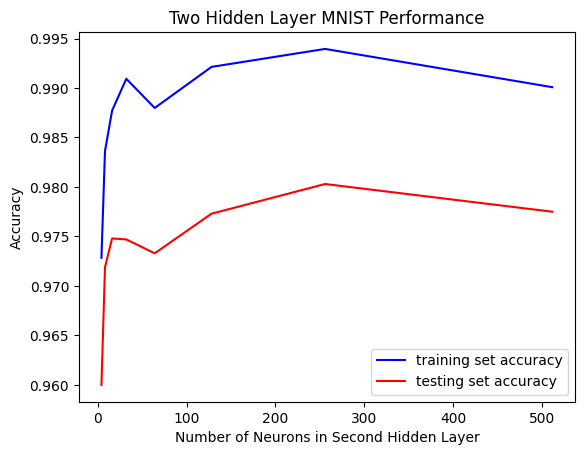

In [12]:
import matplotlib.pyplot as plt

plt.title("Two Hidden Layer MNIST Performance")
plt.xlabel("Number of Neurons in Second Hidden Layer")
plt.ylabel("Accuracy")
plt.plot(neuron_counts, two_layer_results['Training Accuracy'], c='blue', label='training set accuracy')
plt.plot(neuron_counts, two_layer_results['Testing Accuracy'], c='red', label='testing set accuracy')
plt.legend()
plt.show()